Fake News Detection
Simple baseline

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

1. Loading and preprocess data

In [3]:
train_data_path = 'dataset/train_preprocessed.csv'
test_data_path = 'dataset/test_preprocessed.csv'
# Load already preprocessed data
try:
    train_df = pd.read_csv(train_data_path)
    test_df = pd.read_csv(test_data_path)
except FileNotFoundError:
    from preprocess_data import import_data, preprocess_data
    train_df, test_df = import_data(train_data_path, test_data_path)
    train_df, test_df = preprocess_data(train_df, test_df, save=True)

test_df.head()

,title,is_fake
0,роскомнадзор представлять реестр сочетание цве...,0
1,ночь минск президентский гора беларашмор пик д...,0
2,бывший спичрайтер юрий лоза рассказывать трудн...,0
3,сельский церковь собирать рекордно низкий коли...,0
4,акция google рухнуть объявление перезапуск rutube,0


In [22]:
countvec = CountVectorizer(max_features=5000)
X = countvec.fit_transform(train_df.iloc[:, 0]).toarray()
y = train_df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=11)

2. Setup and train XGBM model

In [23]:
xgb_model = XGBClassifier(objective='binary:logistic', 
                          use_label_encoder=False,
                          verbosity=1, n_jobs=1)
                          
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

[19:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


3. Score and visualize results

F1 metric score: 0.764


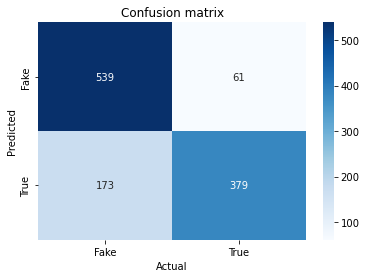

In [26]:
print('F1 metric score: %.3f' %f1_score(y_test, y_pred))

notation = ['Fake', 'True']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  index=notation, columns=notation)
sns.heatmap(cm,cmap='Blues', annot=True, fmt='',
            xticklabels=notation, yticklabels=notation)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix')
plt.show()